In [32]:
import pandas as pd # to import csv and for data manipulation
import matplotlib.pyplot as plt # to plot graph
import seaborn as sns # for intractve graphs
import numpy as np # for linear algebra
import datetime # to dela with date and time
%matplotlib inline
from sklearn.preprocessing import StandardScaler # for preprocessing the data
from sklearn.ensemble import RandomForestClassifier # Random forest classifier
from sklearn.tree import DecisionTreeClassifier # for Decision Tree classifier
from sklearn.svm import SVC # for SVM classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
#from sklearn.cross_validation import train_test_split # to split the data
#from sklearn.cross_validation import KFold # For cross vbalidation
from sklearn.model_selection import GridSearchCV # for tunnig hyper parameter it will use all combination of given parameters
from sklearn.model_selection import RandomizedSearchCV # same for tunning hyper parameter but will use random combinations of parameters
from sklearn.metrics import confusion_matrix,recall_score,precision_recall_curve,auc,roc_curve,roc_auc_score,classification_report
import warnings
warnings.filterwarnings('ignore')

In [33]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = '3'


In [34]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [140]:
import pandas as pd
import tensorflow as tf
import numpy as np

df = pd.read_csv('data/creditcard.csv')

## Preprocessing

In [36]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [37]:
fraud = df[df.Class == 1]
normal = df[df.Class == 0]

In [38]:
X_train = pd.concat([fraud.sample(frac=0.8, random_state = 0),
                    normal.sample(frac=0.8, random_state=0)],
                   axis = 0)
X_test = df.loc[~df.index.isin(X_train.index)]

In [39]:
import numpy as np

y_train = np.zeros((X_train.shape[0],2), dtype = float)
y_train[:,1] = X_train.Class
y_train[:,0] = 1- y_train[:,1]

y_test = np.zeros((X_test.shape[0],2), dtype = float)
y_test[:,1] = X_test.Class
y_test[:,0] = 1 - y_test[:,1]

In [40]:
split = (X_train.shape[0]*7)//8

inputX = X_train.as_matrix()[:split]
inputX_valid = X_train.as_matrix()[split:]
inputX_test = X_test.as_matrix()

inputY = y_train[:split]
inputY_valid = y_train[split:]
iputY_test = y_test

In [41]:
ratio = len(X_train)/len(X_train[X_train.Class == 1])
y_train[:,1]*=ratio

In [42]:
fields = ['Class']
X_train = X_train.drop(fields, axis=1)
X_test = X_test.drop(fields, axis = 1)

In [43]:
features = X_train.columns.values
for feature in features:
    mean = df[feature].mean()
    std = df[feature].std()
    X_train.loc[:, feature] = \
        (X_train[feature] - mean)/ std
    X_test.loc[:, feature] = \
        (X_test[feature] - mean)/std

In [44]:
input_nodes = inputX.shape[1]

x = tf.compat.v1.placeholder(tf.float32, [None, input_nodes])
y_ = tf.compat.v1.placeholder(tf.float32, [None, 2])
pkeep = tf.compat.v1.placeholder(tf.float32)

In [45]:
hidden_nodes1 = 60
hidden_nodes2 = 30
hidden_nodes3 = 15

In [46]:
W1 = tf.Variable(tf.zeros([input_nodes, hidden_nodes1]))
b1 = tf.Variable(tf.zeros([hidden_nodes1]))
y1 = tf.nn.sigmoid(tf.matmul(x,W1) + b1)

In [47]:
W2 = tf.Variable(tf.zeros([hidden_nodes1,hidden_nodes2]))
b2 = tf.Variable(tf.zeros([hidden_nodes2]))
y2 = tf.nn.sigmoid(tf.matmul(y1,W2) + b2)

In [48]:
W3 = tf.Variable(tf.zeros([hidden_nodes2, hidden_nodes3]))
b3 = tf.Variable(tf.zeros([hidden_nodes3]))
y3 = tf.nn.sigmoid(tf.matmul(y2,W3) + b3)
y3 = tf.nn.dropout(y3, pkeep)

In [49]:
W4 = tf.Variable(tf.zeros([ hidden_nodes3, 2]))
b4 = tf.Variable(tf.zeros([2]))
y4 = tf.nn.sigmoid(tf.matmul(y3, W4) + b4)
y = y4

In [50]:
learning_rate = 0.005
cost = -tf.reduce_sum(y_ * tf.compat.v1.log(y))
optimizer = tf.compat.v1.train.AdamOptimizer(0.005)
optimizer = optimizer.minimize(cost)

In [51]:
labels = tf.argmax(y_,1)
predictions = tf.argmax(y,1)
correct = tf.equal(labels, predictions)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [52]:
_, pre_op = tf.compat.v1.metrics.precision(labels, predictions)
_, rec_op = tf.compat.v1.metrics.recall(labels, predictions)

In [53]:
n_epochs = 100
n_samples = inputY.shape[0]
batch_size = 2048
n_batches = n_samples//batch_size
dropout = 0.9

In [57]:
with tf.compat.v1.Session() as sess:
    sess.run(tf.compat.v1.global_variables_initializer())
    sess.run(tf.compat.v1.local_variables_initializer())
    
    for epoch in range(n_epochs):
        for batch in range(n_batches):
            idx1 = batch * batch_size
            idx2 = (1+batch)*batch_size
            batch_x = inputX[idx1:idx2]
            batch_y = inputY[idx1:idx2]
            
            sess.run([optimizer], feed_dict={
                x: batch_x, y_: batch_y, pkeep: dropout})
            
        if epoch % 5 == 0:
            print_epoch(epoch)

Epoch : 0
Training (acc=0.9980, prec=0.0000, recall=0.0000, cost=140673.8)
VAlidation (acc = 1.0000, prec=0.0000, reall = 0.0000, cost = nan)

Epoch : 5
Training (acc=0.9980, prec=0.0000, recall=0.0000, cost=54277.1)
VAlidation (acc = 1.0000, prec=0.0000, reall = 0.0000, cost = nan)

Epoch : 10
Training (acc=0.9980, prec=0.0000, recall=0.0000, cost=34399.5)
VAlidation (acc = 1.0000, prec=0.0000, reall = 0.0000, cost = nan)

Epoch : 15
Training (acc=0.9980, prec=0.0000, recall=0.0000, cost=29552.5)
VAlidation (acc = 1.0000, prec=0.0000, reall = 0.0000, cost = nan)

Epoch : 20
Training (acc=0.9980, prec=0.0000, recall=0.0000, cost=23637.6)
VAlidation (acc = 1.0000, prec=0.0000, reall = 0.0000, cost = nan)

Epoch : 25
Training (acc=0.9980, prec=0.0000, recall=0.0000, cost=24580.3)
VAlidation (acc = 1.0000, prec=0.0000, reall = 0.0000, cost = nan)

Epoch : 30
Training (acc=0.9980, prec=0.0000, recall=0.0000, cost=17619.4)
VAlidation (acc = 1.0000, prec=0.0000, reall = 0.0000, cost = nan)



In [55]:
def print_epoch(epoch):
    trn_res = sess.run([accuracy, pre_op, rec_op, cost],
                      feed_dict={x: inputX,
                                y_ : inputY,
                                pkeep : dropout})
    vld_res = sess.run([accuracy, pre_op, rec_op, cost],
                      feed_dict={x: inputX_valid,
                                y_: inputY_valid,
                                pkeep:1})
    print('Epoch : {}'.format(epoch))
    print('Training (acc={:.4f}, prec={:.4f}, '
         'recall={:.4f}, cost={:.1f})'. format(*trn_res))
    print('VAlidation (acc = {:.4f}, prec={:.4f}, '
          'reall = {:.4f}, cost = {:.1f})\n'.format(*vld_res))

In [56]:
ratio = len(X_train)/ len(X_train[X_train.Class ==1])
y_train[:,1]*= ratio

AttributeError: 'DataFrame' object has no attribute 'Class'

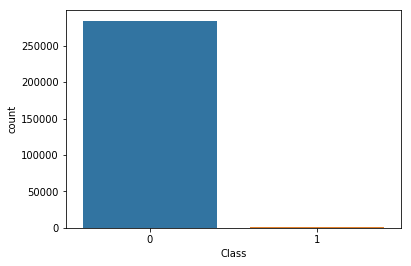

In [141]:
# Now lets check the class distributions
sns.countplot("Class",data=df)

In [142]:
Count_Normal_transacation = len(df[df["Class"]==0]) # normal transaction are repersented by 0
Count_Fraud_transacation = len(df[df["Class"]==1]) # fraud by 1
Percentage_of_Normal_transacation = Count_Normal_transacation/(Count_Normal_transacation+Count_Fraud_transacation)
print("percentage of normal transacation is",Percentage_of_Normal_transacation*100)
Percentage_of_Fraud_transacation= Count_Fraud_transacation/(Count_Normal_transacation+Count_Fraud_transacation)
print("percentage of fraud transacation",Percentage_of_Fraud_transacation*100)

percentage of normal transacation is 99.82725143693798
percentage of fraud transacation 0.1727485630620034


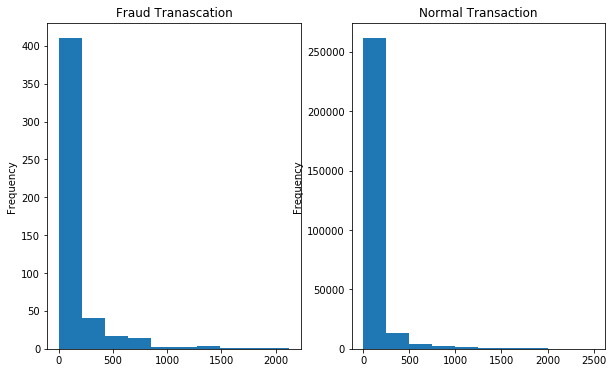

In [143]:
Fraud_transacation = df[df["Class"]==1]
Normal_transacation= df[df["Class"]==0]
plt.figure(figsize=(10,6))
plt.subplot(121)
Fraud_transacation[Fraud_transacation["Amount"]<= 2500].Amount.plot.hist(title="Fraud Tranascation")
plt.subplot(122)
Normal_transacation[Normal_transacation["Amount"]<=2500].Amount.plot.hist(title="Normal Transaction")

In [144]:
# for undersampling we need a portion of majority class and will take whole data of minority class
# count fraud transaction is the total number of fraud transaction
# now lets us see the index of fraud cases
fraud_indices= np.array(df[df.Class==1].index)
normal_indices = np.array(df[df.Class==0].index)
#now let us a define a function for make undersample data with different proportion
#different proportion means with different proportion of normal classes of data
def undersample(normal_indices,fraud_indices,times):#times denote the normal data = times*fraud data
    Normal_indices_undersample = np.array(np.random.choice(normal_indices,(times*Count_Fraud_transacation),replace=False))
    undersample_data= np.concatenate([fraud_indices,Normal_indices_undersample])
    undersample_data = df.iloc[undersample_data,:]
    
    print("the normal transacation proportion is :",len(undersample_data[undersample_data.Class==0])/len(undersample_data[undersample_data.Class]))
    print("the fraud transacation proportion is :",len(undersample_data[undersample_data.Class==1])/len(undersample_data[undersample_data.Class]))
    print("total number of record in resampled data is:",len(undersample_data[undersample_data.Class]))
    return(undersample_data)

In [145]:
def model(model,features_train,features_test,labels_train,labels_test):
    clf= model
    clf.fit(features_train,labels_train.values.ravel())
    pred=clf.predict(features_test)
    cnf_matrix=confusion_matrix(labels_test,pred)
    print("the recall for this model is :",cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0]))
    fig= plt.figure(figsize=(6,3))# to plot the graph
    print("TP",cnf_matrix[1,1,]) # no of fraud transaction which are predicted fraud
    print("TN",cnf_matrix[0,0]) # no. of normal transaction which are predited normal
    print("FP",cnf_matrix[0,1]) # no of normal transaction which are predicted fraud
    print("FN",cnf_matrix[1,0]) # no of fraud Transaction which are predicted normal
    sns.heatmap(cnf_matrix,cmap="coolwarm_r",annot=True,linewidths=0.5)
    plt.title("Confusion_matrix")
    plt.xlabel("Predicted_class")
    plt.ylabel("Real class")
    plt.show()
    print("\n----------Classification Report------------------------------------")
    print(classification_report(labels_test,pred))

In [187]:
data = pd.read_csv('data/creditcard.csv')

In [156]:
print("length of training data",len(data))
print("length of normal data",len(data[data["Class"]==0]))
print("length of fraud  data",len(data[data["Class"]==1]))

length of training data 284807
length of normal data 284315
length of fraud  data 492


In [157]:
data_train_X,data_test_X,data_train_y,data_test_y=data_prepration(data)
data_train_X.columns
data_train_y.columns

length of training data
199364
length of test data
85443


Index(['Class'], dtype='object')

In [158]:
# ok Now we have a traing data
data_train_X["Class"]= data_train_y["Class"] # combining class with original data
data_train = data_train_X.copy() # for naming conevntion
print("length of training data",len(data_train))
# Now make data set of normal transction from train data
normal_data = data_train[data_train["Class"]==0]
print("length of normal data",len(normal_data))
fraud_data = data_train[data_train["Class"]==1]
print("length of fraud data",len(fraud_data))

length of training data 199364
length of normal data 199026
length of fraud data 338


In [159]:
# Now start oversamoling of training data 
# means we will duplicate many times the value of fraud data
for i in range (365): # the number is choosen by myself on basis of nnumber of fraud transaction
    normal_data= normal_data.append(fraud_data)
os_data = normal_data.copy() 
print("length of oversampled data is ",len(os_data))
print("Number of normal transcation in oversampled data",len(os_data[os_data["Class"]==0]))
print("No.of fraud transcation",len(os_data[os_data["Class"]==1]))
print("Proportion of Normal data in oversampled data is ",len(os_data[os_data["Class"]==0])/len(os_data))
print("Proportion of fraud data in oversampled data is ",len(os_data[os_data["Class"]==1])/len(os_data))

length of oversampled data is  322396
Number of normal transcation in oversampled data 199026
No.of fraud transcation 123370
Proportion of Normal data in oversampled data is  0.6173339619598258
Proportion of fraud data in oversampled data is  0.3826660380401742


In [161]:
os_data["Normalized Amount"] = StandardScaler().fit_transform(os_data['Amount'].values.reshape(-1, 1))
os_data.drop(["Time","Amount"],axis=1,inplace=True)
os_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Normalized Amount
23635,-1.111180,0.488062,1.574197,0.117696,1.494138,-1.545635,1.127500,-0.436162,-0.803863,-0.472697,...,0.063990,0.113860,-0.378432,0.397011,0.874979,-0.410202,-0.178266,-0.155620,0,-0.398035
113307,1.155020,-0.087787,1.113016,1.207574,-0.808011,0.228282,-0.740631,0.292216,0.626402,0.120185,...,0.139803,0.507071,-0.125359,0.005351,0.488751,-0.236149,0.058087,0.019627,0,-0.401069
125671,-8.838201,7.090699,-7.615316,0.014220,-3.115910,3.621317,-7.945156,2.136112,-2.482299,-2.279181,...,-1.640863,0.711052,1.136335,0.934447,0.198898,-0.445902,-2.998625,-0.566475,0,-0.393541
59644,-3.672287,2.427329,-0.490603,-1.307071,-1.526968,-1.431511,-0.546984,1.541659,0.685910,0.567629,...,-0.235393,-0.512431,0.395807,0.588687,-0.113574,0.660290,0.164980,-0.011680,0,-0.404909
133930,-0.567212,0.242119,0.167650,-1.328514,-0.234984,0.560538,-0.149508,0.682745,-1.468155,-0.454765,...,0.074991,-0.096716,-0.011775,-1.247403,0.132504,-0.254305,-0.099331,-0.041131,0,-0.054277


length of training data
225677
length of test data
96719
the recall for this model is : 1.0
TP 37035
TN 59680
FP 4
FN 0


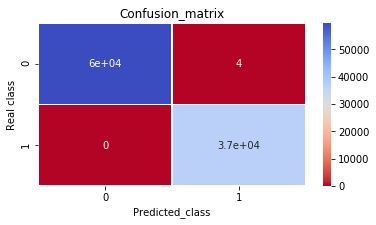


----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     59684
           1       1.00      1.00      1.00     37035

   micro avg       1.00      1.00      1.00     96719
   macro avg       1.00      1.00      1.00     96719
weighted avg       1.00      1.00      1.00     96719



In [162]:
os_train_X,os_test_X,os_train_y,os_test_y=data_prepration(os_data)
clf= RandomForestClassifier(n_estimators=100)
model(clf,os_train_X,os_test_X,os_train_y,os_test_y)

In [180]:
os_data_X = os_data.ix[:,os_data.columns != "Class"]
os_data_y = os_data.ix[:,os_data.columns == "Class"]
#for that we have to standrdize the normal amount and drop the time from it
data_test_X["Normalized Amount"] = StandardScaler().fit_transform(data_test_X['Amount'].values.reshape(-1, 1))
data_test_X.drop(["Time","Amount"],axis=1,inplace=True)
data_test_X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Normalized Amount
105367,-0.147373,0.789323,0.622057,-0.582143,0.651374,-0.531725,0.639956,0.046745,-0.423778,-0.581660,...,-0.155906,-0.093052,-0.361029,0.131302,-0.421719,-1.234660,-0.236602,0.184803,0.229373,-0.339084
19175,-0.174573,-0.292719,1.633864,-2.166797,-1.757145,-0.248346,-1.970192,-2.675862,-2.245625,0.262899,...,0.299960,-1.368580,0.355764,-0.206692,0.363486,1.303935,-0.091334,0.020797,0.171985,-0.291100
242167,-1.031791,1.166991,-0.135839,-0.779336,0.689600,-0.637809,0.724443,0.307198,-0.291207,-0.450531,...,0.049390,-0.236798,-0.478814,0.324553,0.615054,-0.421154,0.126244,0.376908,0.212422,-0.298779
55369,1.013886,-1.813948,0.613326,-1.176938,-1.850081,-0.179643,-1.033002,-0.092681,-1.699229,1.244834,...,0.169581,0.170849,0.489380,-0.212579,0.124797,0.245457,-0.044803,0.035379,0.065555,0.589064
48955,-12.665062,-8.632804,-8.318791,1.875694,-22.064519,14.672360,23.863052,-6.156826,2.520556,-0.287792,...,-13.684210,-5.733766,1.051820,-1.292170,0.751013,0.759148,1.070889,2.412802,-0.853621,17.693781


the recall for this model is : 0.7662337662337663
TP 118
TN 85285
FP 4
FN 36


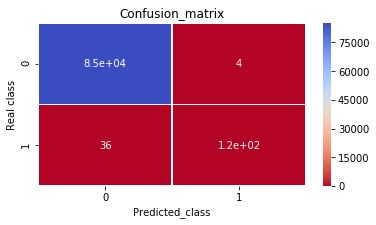


----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85289
           1       0.97      0.77      0.86       154

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.98      0.88      0.93     85443
weighted avg       1.00      1.00      1.00     85443



In [181]:
clf= RandomForestClassifier(n_estimators=100)
model(clf,os_data_X,data_test_X,os_data_y,data_test_y)

In [188]:
os = SMOTE(random_state=0) #   We are using SMOTE as the function for oversampling
# now we can devided our data into training and test data
# Call our method data prepration on our dataset
data_train_X,data_test_X,data_train_y,data_test_y=data_prepration(data)
columns = data_train_X.columns

length of training data
199364
length of test data
85443


In [189]:
os_data_X,os_data_y=os.fit_sample(data_train_X,data_train_y)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=["Class"])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of normal transcation in oversampled data",len(os_data_y[os_data_y["Class"]==0]))
print("No.of fraud transcation",len(os_data_y[os_data_y["Class"]==1]))
print("Proportion of Normal data in oversampled data is ",len(os_data_y[os_data_y["Class"]==0])/len(os_data_X))
print("Proportion of fraud data in oversampled data is ",len(os_data_y[os_data_y["Class"]==1])/len(os_data_X))

length of oversampled data is  398018
Number of normal transcation in oversampled data 199009
No.of fraud transcation 199009
Proportion of Normal data in oversampled data is  0.5
Proportion of fraud data in oversampled data is  0.5


In [190]:
os_data_X["Normalized Amount"] = StandardScaler().fit_transform(os_data_X['Amount'].values.reshape(-1, 1))
os_data_X.drop(["Time","Amount"],axis=1,inplace=True)
data_test_X["Normalized Amount"] = StandardScaler().fit_transform(data_test_X['Amount'].values.reshape(-1, 1))
data_test_X.drop(["Time","Amount"],axis=1,inplace=True)

the recall for this model is : 0.7737226277372263
TP 106
TN 85288
FP 18
FN 31


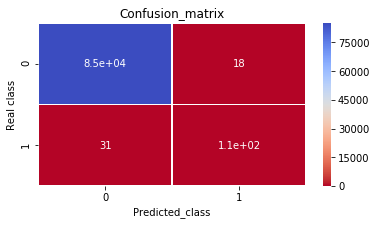


----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85306
           1       0.85      0.77      0.81       137

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.93      0.89      0.91     85443
weighted avg       1.00      1.00      1.00     85443



In [191]:
clf= RandomForestClassifier(n_estimators=100)
# train data using oversampled data and predict for the test data
model(clf,os_data_X,data_test_X,os_data_y,data_test_y)